We want to specify parameter $\alpha,\beta$ to fit data. 

$$
y = e^{\alpha + \beta x}
$$

Whether the two optimzing problems get same result?

$$
\min_{\alpha,\beta} \sum_{i=1}^n (y_i - e^{\alpha + \beta x_i})^2
$$

and

$$
\min_{\alpha,\beta} \sum_{i=1}^n (\log y_i - (\alpha + \beta x_i))^2
$$

In [1]:
import numpy as np
from scipy.optimize import minimize,least_squares
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
plt.style.use('ggplot')


In [2]:
p=0.95
n=200



In [3]:
g = np.random.geometric(1-p,size=n)
succ = g - 1
N = succ.max()
s = np.zeros((n,N))
for i in range(n):
    s[i,np.arange(succ[i])] = 1
S = np.sum(s,axis=0)

In [4]:
S

array([ 191.,  183.,  174.,  163.,  156.,  149.,  140.,  137.,  132.,
        126.,  122.,  116.,  109.,  103.,  102.,   95.,   90.,   85.,
         80.,   75.,   73.,   69.,   65.,   64.,   60.,   59.,   59.,
         56.,   51.,   49.,   48.,   44.,   41.,   38.,   37.,   35.,
         35.,   33.,   32.,   31.,   29.,   27.,   23.,   22.,   22.,
         21.,   20.,   19.,   19.,   18.,   17.,   16.,   15.,   14.,
         13.,   13.,   13.,   13.,   12.,   11.,   11.,    9.,    9.,
          9.,    7.,    6.,    6.,    5.,    5.,    5.,    5.,    5.,
          5.,    5.,    5.,    5.,    4.,    4.,    4.,    4.,    3.,
          2.,    2.,    2.,    2.,    2.,    2.,    1.,    1.,    1.,
          1.,    1.,    1.,    1.])

In [5]:
y = S
x = np.arange(1,N+1)

In [6]:
def generate(p,n,only_S = False):
    g = np.random.geometric(1-p,size=n)
    succ = g - 1
    N = succ.max()
    s = np.zeros((n,N))
    for i in range(n):
        s[i,np.arange(succ[i])] = 1
    S = np.sum(s,axis=0)
    if only_S:
        return S
    x = np.arange(1,N+1)
    return x,S

In [7]:
x,y = generate(0.97,2000)

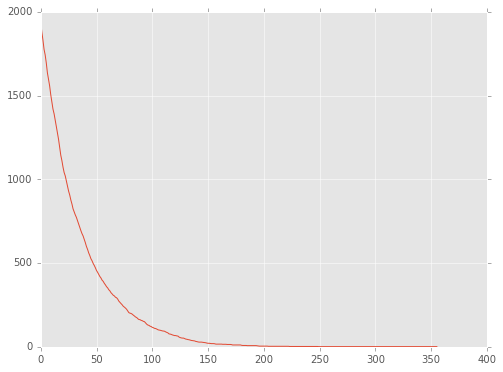

In [8]:
plt.plot(y)

In [9]:
def fun1(p):
    a,b = p
    yy = np.exp(a + b*x)
    return np.sum((y - yy)**2)

def fun2(p):
    a,b = p
    logy = np.log(y)
    logyy = a + b*x
    return np.sum((logy-logyy)**2)



In [10]:
minimize(fun1,x0 = (-1,-1),method='BFGS')

      fun: 67712594.348888457
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ -817., -1272.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 39
      nit: 0
     njev: 7
   status: 2
  success: False
        x: array([-1., -1.])

In [11]:
res = minimize(fun2,x0 = (-1,-1))
res

      fun: 118.82709027954628
 hess_inv: array([[  5.64172020e-03,  -2.37379572e-05],
       [ -2.37379572e-05,   1.32985738e-07]])
      jac: array([ -9.53674316e-07,   9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([ 7.07297184, -0.02421235])

In [12]:
a,b = res.x
np.exp(a),np.exp(b)

(1179.6485530014443, 0.97607841438308385)

In [13]:
def fun3(p):
    cut = 50
    a,b = p
    logy = np.log(y[cut:])
    logyy = a + b*x[cut:]
    return np.sum((logy-logyy)**2)


In [14]:
res2 = minimize(fun3,x0 = (-1,-1))
a,b = res2.x
np.exp(a),np.exp(b)

(805.29524020919177, 0.9775896822607284)

Let's try it on real data.

In [15]:
data_file_name='data.csv'
df=pd.read_csv(data_file_name)

In [16]:
df.head()

,id,content,des_len,diff,hit,id.1,solve,t_content
0,1,187,25,5,13792,1,537234,85
1,2,312,32,5,7571,2,438350,135
2,3,111,17,5,6364,3,317208,65
3,4,209,20,5,5414,4,285419,101
4,5,206,24,5,4627,5,297082,70


In [17]:
log = np.log
exp = np.exp
res = smf.ols('log(solve) ~ id',data=df).fit()

In [18]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log(solve)   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1466.
Date:                Sat, 13 May 2017   Prob (F-statistic):          7.30e-109
Time:                        14:27:29   Log-Likelihood:                -255.98
No. Observations:                 262   AIC:                             516.0
Df Residuals:                     260   BIC:                             523.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     11.4630      0.080    143.363      0.000        11.306    11.620
id            -0.0202      0.001    -38.287      0.000        -0.021    -0.019
==============================================================================
Omnibus:                       22.352   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.530
Skew:                           0.712   Prob(JB):                     2.86e-06
Kurtosis:                       3.558   Cond. No.                         304.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
logn,logp = res.params
exp(logn),exp(logp)

(95132.768745309499, 0.98002165648895589)

In [20]:
cut = df.shape[0]//10
df2 = df.ix[:cut]
df3 = df.ix[cut:]

In [21]:
res = smf.ols('log(solve) ~ id',data=df2).fit()
logn,logp = res.params
exp(logn),exp(logp)

(425752.36210311513, 0.92758983628363301)

In [22]:
res = smf.ols('log(solve) ~ id',data=df3).fit()
logn,logp = res.params
exp(logn),exp(logp)

(61664.20658032129, 0.98240025301503431)

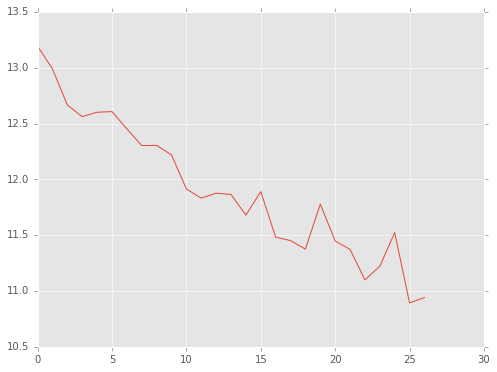

In [23]:
plt.plot(log(df2.solve))

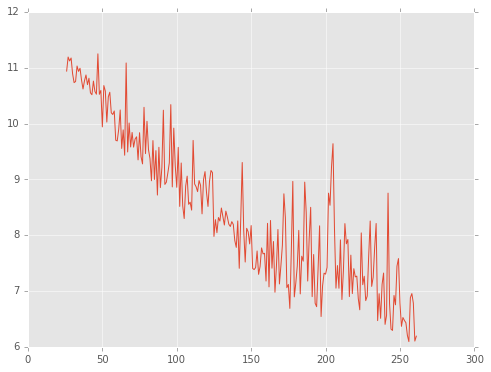

In [24]:
plt.plot(log(df3.solve))

In [25]:
res.params

Intercept    11.029459
id           -0.017756
dtype: float64

In [26]:
df4 = df3.copy()
df4['id'] -= df4['id'].min() -1

In [27]:
res = smf.ols('log(solve) ~ id',data=df).fit()
logn,logp = res.params
n,p = exp(logn),exp(logp)
n,p

(95132.768745309499, 0.98002165648895589)

In [28]:
print(res.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &    log(solve)    & \textbf{  R-squared:         } &     0.849   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.849   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     1466.   \\
\textbf{Date:}             & Sat, 13 May 2017 & \textbf{  Prob (F-statistic):} & 7.30e-109   \\
\textbf{Time:}             &     14:27:30     & \textbf{  Log-Likelihood:    } &   -255.98   \\
\textbf{No. Observations:} &         262      & \textbf{  AIC:               } &     516.0   \\
\textbf{Df Residuals:}     &         260      & \textbf{  BIC:               } &     523.1   \\
\textbf{Df Model:}         &           1      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lccccc}
                   & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$>$$|$t$|$} & \textbf{[95.0\% Conf. Int.]}  \\
\midrule
\t

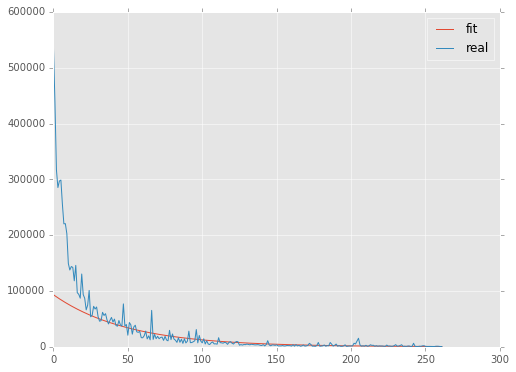

In [29]:

plt.plot(n*p**df.id,label='fit')
plt.plot(df.solve,label='real')
plt.legend()
plt.show()

In [30]:
K = int(df.shape[0] * 1/10)
df['lid'] = df['id'] * (df['id'] < K)
df['rid'] = df['id'] * (df['id'] >= K)
df['lC'] = (df['id'] < K).astype('int')
df['rC'] = (df['id'] >= K).astype('int')
#df['lK'] = df['id'] < K
#df['gK'] = df['id] >= K

In [31]:
res = smf.ols('log(solve) ~ lC + lid + rC + rid -1',data = df).fit()

In [32]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log(solve)   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     677.2
Date:                Sat, 13 May 2017   Prob (F-statistic):          5.95e-122
Time:                        14:27:31   Log-Likelihood:                -217.95
No. Observations:                 262   AIC:                             443.9
Df Residuals:                     258   BIC:                             458.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lC            12.9522      0.231     56.072      0.000        12.497    13.407
lid           -0.0741      0.016     -4.770      0.000        -0.105    -0.044
rC            11.0358      0.085    130.136      0.000        10.869    11.203
rid           -0.0178      0.001    -33.447      0.000        -0.019    -0.017
==============================================================================
Omnibus:                       27.715   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.377
Skew:                           0.699   Prob(JB):                     4.64e-09
Kurtosis:                       4.249   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
print(res.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &    log(solve)    & \textbf{  R-squared:         } &     0.887   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.886   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     677.2   \\
\textbf{Date:}             & Sat, 13 May 2017 & \textbf{  Prob (F-statistic):} & 5.95e-122   \\
\textbf{Time:}             &     14:27:32     & \textbf{  Log-Likelihood:    } &   -217.95   \\
\textbf{No. Observations:} &         262      & \textbf{  AIC:               } &     443.9   \\
\textbf{Df Residuals:}     &         258      & \textbf{  BIC:               } &     458.2   \\
\textbf{Df Model:}         &           3      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lccccc}
             & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$>$$|$t$|$} & \textbf{[95.0\% Conf. Int.]}  \\
\midrule
\textbf{

In [34]:
logn1,logp1,logn2,logp2 = res.params
n1,p1,n2,p2 = exp(logn1),exp(logp1),exp(logn2),exp(logp2)
n1,p1,n2,p2

(421772.40912348649,
 0.92856124376505211,
 62056.962122289784,
 0.98236629358616134)

In [35]:
res2 = smf.ols('log(solve) ~ id',data=df2).fit()
logn2,logp2 = res2.params
n2,p2 = exp(logn2),exp(logp2)

In [36]:
res3 = smf.ols('log(solve) ~ id',data=df3).fit()
logn3,logp3 = res3.params
n3,p3 = exp(logn3),exp(logp3)

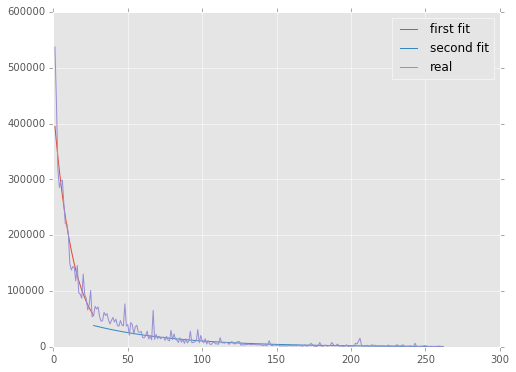

In [37]:
plt.plot(df2.id,n2*p2**df2.id,label='first fit')
plt.plot(df3.id,n3*p3**df3.id,label='second fit')
plt.plot(df.id,df.solve,label='real')
#plt.yscale('log')
plt.legend()
plt.show()

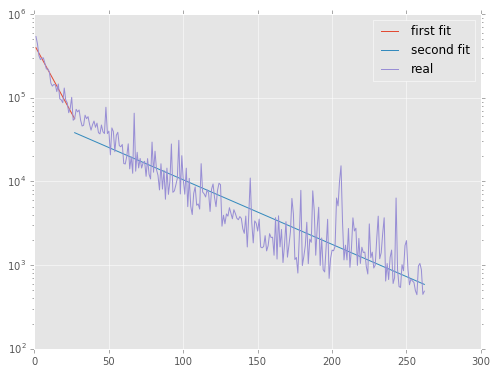

In [38]:
plt.plot(df2.id,n2*p2**df2.id,label='first fit')
plt.plot(df3.id,n3*p3**df3.id,label='second fit')
plt.plot(df.id,df.solve,label='real')
plt.yscale('log')
plt.legend()
plt.show()

In [39]:
df.head(10)

,id,content,des_len,diff,hit,id.1,solve,t_content,lid,rid,lC,rC
0,1,187,25,5,13792,1,537234,85,1,0,1,0
1,2,312,32,5,7571,2,438350,135,2,0,1,0
2,3,111,17,5,6364,3,317208,65,3,0,1,0
3,4,209,20,5,5414,4,285419,101,4,0,1,0
4,5,206,24,5,4627,5,297082,70,5,0,1,0
5,6,431,17,5,4524,6,298805,156,6,0,1,0
6,7,137,16,5,3756,7,256030,62,7,0,1,0
7,8,1255,30,5,4263,8,220371,1071,8,0,1,0
8,9,229,46,5,4090,9,220702,157,9,0,1,0
9,10,105,19,5,3710,10,202710,65,10,0,1,0


In [40]:
rank = df.solve.rank(ascending=False)
rank.head(10)

0     1.0
1     2.0
2     3.0
3     6.0
4     5.0
5     4.0
6     7.0
7     9.0
8     8.0
9    10.0
Name: solve, dtype: float64

In [41]:
df['solve_rank'] = rank

In [42]:
df.head(10)

,id,content,des_len,diff,hit,id.1,solve,t_content,lid,rid,lC,rC,solve_rank
0,1,187,25,5,13792,1,537234,85,1,0,1,0,1.0
1,2,312,32,5,7571,2,438350,135,2,0,1,0,2.0
2,3,111,17,5,6364,3,317208,65,3,0,1,0,3.0
3,4,209,20,5,5414,4,285419,101,4,0,1,0,6.0
4,5,206,24,5,4627,5,297082,70,5,0,1,0,5.0
5,6,431,17,5,4524,6,298805,156,6,0,1,0,4.0
6,7,137,16,5,3756,7,256030,62,7,0,1,0,7.0
7,8,1255,30,5,4263,8,220371,1071,8,0,1,0,9.0
8,9,229,46,5,4090,9,220702,157,9,0,1,0,8.0
9,10,105,19,5,3710,10,202710,65,10,0,1,0,10.0


In [43]:
def fun(param):
    n1,n2,p = param
    Esolve = n1*p**df['id'] + n2*p**df['solve_rank']
    return np.sum((df['solve'] - Esolve)**2)

In [44]:
minimize(fun,( 305132,100,0.98))

      fun: 627363351114.1097
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([  5.09542400e+06,   4.83328000e+06,   7.01454574e+13])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 27
      nit: 0
     njev: 3
   status: 2
  success: False
        x: array([  3.05132000e+05,   1.00000000e+02,   9.80000000e-01])

In [45]:
fun((100000,100000,0.9))

584823550802.3755

In [46]:
param = ( 95132,100,0.98)

In [47]:
    n1,n2,p = param
    Esolve = n1*p**df['id'] + n2*p**df['solve_rank']


In [48]:
Esolve.head()

0    93327.360000
1    91460.812800
2    89631.596544
3    87835.312035
4    86082.185321
dtype: float64

In [49]:
np.sum((df['solve'] - Esolve)**2)

630961486197.7689

In [50]:
minimize(fun,x0 = (10000,15000,0.95),bounds=((0,None),(0,None),(0,0.9999)),tol=1e-6)

      fun: 56480545798.34385
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.44958496e+04,  -1.52587891e+04,   8.95867691e+09])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 84
      nit: 10
   status: 0
  success: True
        x: array([  2.19010514e+05,   2.28833833e+05,   9.30164431e-01])

In [51]:
minimize(fun,x0 = (10000,15000,0.95),bounds=((0,None),(0,None),(0,0.9999)))

      fun: 54983198388.18133
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  4.57763672e+03,  -3.05175781e+03,   6.28357697e+08])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 492
      nit: 41
   status: 0
  success: True
        x: array([  1.36106744e+05,   3.11131684e+05,   9.30330085e-01])

In [52]:
minimize(fun,x0 = (10000,15000,0.95),bounds=((0,None),(0,None),(0,0.9999)),tol=1e-10)

      fun: 54983198388.18133
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  4.57763672e+03,  -3.05175781e+03,   6.28357697e+08])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 492
      nit: 41
   status: 0
  success: True
        x: array([  1.36106744e+05,   3.11131684e+05,   9.30330085e-01])

In [53]:
minimize(fun,x0 = (100000,100000,0.95),bounds=((0,None),(0,None),(0,0.9999)))

      fun: 56586930847.23505
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.22070312e+04,  -1.67846680e+04,  -1.53985825e+09])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 108
      nit: 11
   status: 0
  success: True
        x: array([  2.22992967e+05,   2.25423658e+05,   9.30011451e-01])

In [54]:
def fun(param):
    n1,n2,p1,p2 = param
    Esolve = n1*p1**df['id'] + n2*p2**df['id']
    return np.sum((df['solve'] - Esolve)**2)

In [55]:
res = minimize(fun,x0 = (100000,80000,0.95,0.95),bounds=((0,None),(0,None),(0,0.99999),(0,0.99999)))
res

      fun: 23357538257.449345
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([  6.10351562e+03,   6.48498535e+03,   4.06295776e+07,
        -2.68366623e+08])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 410
      nit: 42
   status: 0
  success: True
        x: array([  4.25457821e+05,   1.52096499e+05,   8.27528636e-01,
         9.71799384e-01])

In [56]:
n1,n2,p1,p2 = res.x

In [57]:
Esolve = n1*p1**df['id'] + n2*p2**df['id']

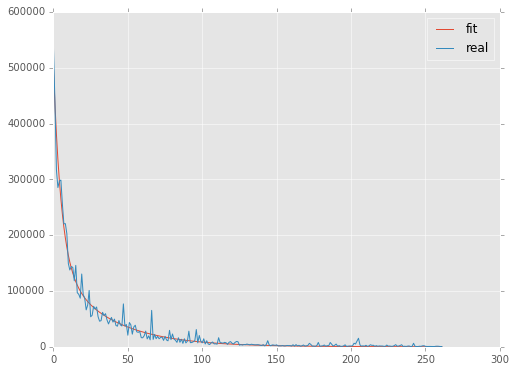

In [58]:
plt.plot(Esolve, label='fit')
plt.plot(df.solve, label='real')
plt.legend()
plt.show()

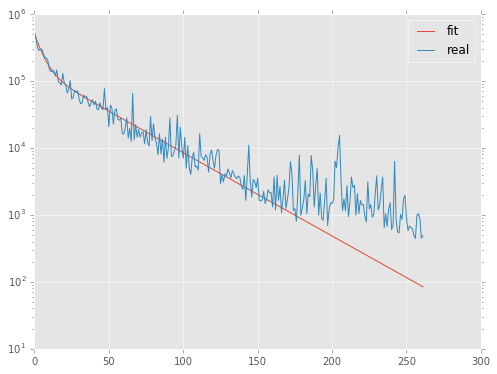

In [59]:
plt.plot(Esolve, label='fit')
plt.plot(df.solve, label='real')
plt.yscale('log')
plt.legend()
plt.show()

In [60]:
def fun(param):
    n1,n2,n3,p1,p2,p3 = param
    Esolve = n1*p1**df['id'] + n2*p2**df['id'] + + n3*p3**df['id']
    return np.sum((df['solve'] - Esolve)**2)

In [61]:
res = minimize(fun,x0 = (160000,80000,40000,0.9,0.95,0.98),bounds=((0,None),(0,None),(0,None),(0,0.99999),(0,0.99999),(0,0.99999)))
res

      fun: 19162046683.818653
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -3.81469727e+03,  -1.67846680e+04,   1.67846680e+04,
         5.02391815e+07,   4.45190430e+07,   2.30589676e+08])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 959
      nit: 80
   status: 0
  success: True
        x: array([  3.14874634e+05,   3.12449104e+05,   1.37903081e+05,
         3.99205594e-01,   8.73436068e-01,   9.72693747e-01])

In [62]:
n1,n2,n3,p1,p2,p3 = res.x
Esolve = n1*p1**df['id'] + n2*p2**df['id'] + n3*p3**df['id']

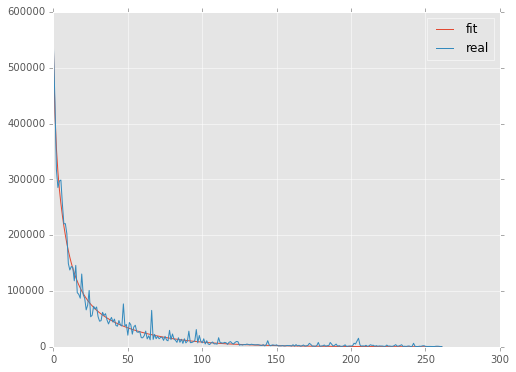

In [63]:
plt.plot(Esolve, label='fit')
plt.plot(df.solve, label='real')
plt.legend()
plt.show()

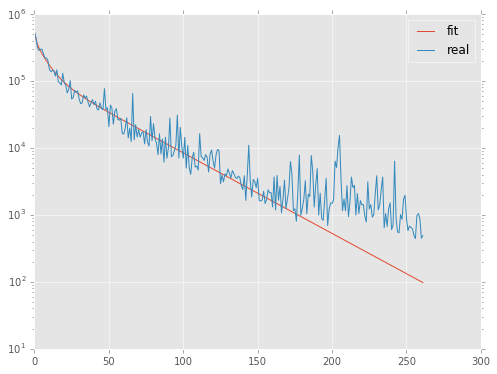

In [64]:
plt.plot(Esolve, label='fit')
plt.plot(df.solve, label='real')
plt.yscale('log')
plt.legend()
plt.show()

In [65]:
df['solve_rank_rev'] = df['solve_rank'].max() - df['solve_rank'] + 1

In [66]:
df.tail()

,id,content,des_len,diff,hit,id.1,solve,t_content,lid,rid,lC,rC,solve_rank,solve_rank_rev
257,258,126,15,70,237,258,973,131,0,258,0,1,236.0,27.0
258,259,717,9,70,194,259,1047,270,0,259,0,1,227.5,35.5
259,260,1164,10,70,287,260,882,495,0,260,0,1,241.0,22.0
260,261,458,11,85,334,261,447,304,0,261,0,1,261.0,2.0
261,262,997,12,80,210,262,488,193,0,262,0,1,260.0,3.0


In [67]:
def fun(param):
    n1,n2,p1,p2 = param
    Esolve = n1*p1**df['id'] + n2*p2**df['solve_rank_rev']
    return np.sum((df['solve'] - Esolve)**2)

In [68]:
res = minimize(fun,x0 = (100000,15000,0.9,0.95),bounds=((0,None),(0,None),(0,0.9999),(0,0.9999)))
res

      fun: 69394083796.6872
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.52587891e+03,   0.00000000e+00,   4.98687744e+07,
         2.73437500e+06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 375
      nit: 29
   status: 0
  success: True
        x: array([  4.47616391e+05,   7.30544278e+03,   9.29196241e-01,
         9.85999189e-02])

In [69]:
n1,n2,p1,p2 = res.x
Esolve = n1*p1**df['id'] + n2*p2**df['solve_rank_rev']

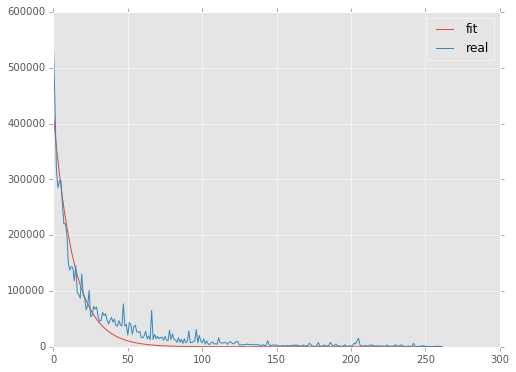

In [70]:
plt.plot(Esolve, label='fit')
plt.plot(df.solve, label='real')
plt.legend()
plt.show()

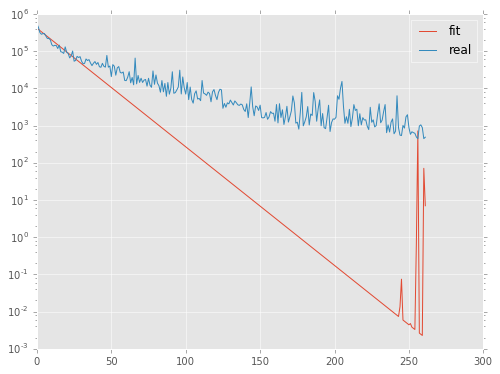

In [71]:
plt.plot(Esolve, label='fit')
plt.plot(df.solve, label='real')
plt.yscale('log')
plt.legend()
plt.show()

In [72]:
solve = df['solve']

In [73]:
df['solve_l1'] = solve.shift(1)
df['solve_l2'] = solve.shift(2)
df['solve_l3'] = solve.shift(3)
df['solve_l4'] = solve.shift(4)
df['solve_l5'] = solve.shift(5)

In [74]:
df.head()

,id,content,des_len,diff,hit,id.1,solve,t_content,lid,rid,lC,rC,solve_rank,solve_rank_rev,solve_l1,solve_l2,solve_l3,solve_l4,solve_l5
0,1,187,25,5,13792,1,537234,85,1,0,1,0,1.0,262.0,NaN,NaN,NaN,NaN,NaN
1,2,312,32,5,7571,2,438350,135,2,0,1,0,2.0,261.0,537234.0,NaN,NaN,NaN,NaN
2,3,111,17,5,6364,3,317208,65,3,0,1,0,3.0,260.0,438350.0,537234.0,NaN,NaN,NaN
3,4,209,20,5,5414,4,285419,101,4,0,1,0,6.0,257.0,317208.0,438350.0,537234.0,NaN,NaN
4,5,206,24,5,4627,5,297082,70,5,0,1,0,5.0,258.0,285419.0,317208.0,438350.0,537234.0,NaN


In [75]:
res = smf.ols('solve ~ solve_l1', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solve   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     5951.
Date:                Sat, 13 May 2017   Prob (F-statistic):          1.05e-180
Time:                        14:27:43   Log-Likelihood:                -2816.2
No. Observations:                 261   AIC:                             5636.
Df Residuals:                     259   BIC:                             5644.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2004.0414    796.786      2.515      0.013       435.037  3573.046
solve_l1       0.8586      0.011     77.142      0.000         0.837     0.881
==============================================================================
Omnibus:                       74.396   Durbin-Watson:                   2.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              869.448
Skew:                           0.739   Prob(JB):                    1.59e-189
Kurtosis:                      11.818   Cond. No.                     7.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

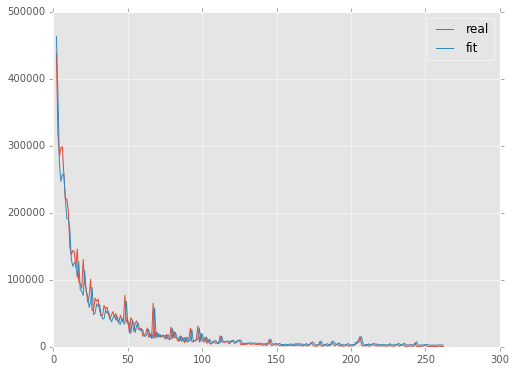

In [76]:
axis = df['id'][1:]
plt.plot(axis, df['solve'][1:], label='real')
plt.plot(axis, res.predict(), label='fit')
plt.legend()

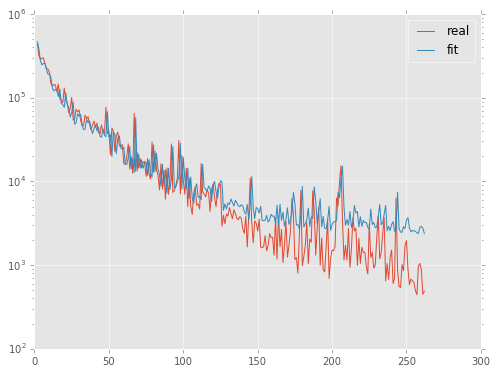

In [77]:
axis = df['id'][1:]
plt.plot(axis, df['solve'][1:], label='real')
plt.plot(axis, res.predict(), label='fit')
plt.yscale('log')
plt.legend()

In [78]:
#print(res.summary().as_latex())

In [79]:
res = smf.ols('solve ~ solve_l1 -1', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solve   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     7133.
Date:                Sat, 13 May 2017   Prob (F-statistic):          5.01e-191
Time:                        14:27:45   Log-Likelihood:                -2819.4
No. Observations:                 261   AIC:                             5641.
Df Residuals:                     260   BIC:                             5644.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
solve_l1       0.8698      0.010     84.458      0.000         0.850     0.890
==============================================================================
Omnibus:                       62.426   Durbin-Watson:                   2.362
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              945.115
Skew:                           0.399   Prob(JB):                    5.90e-206
Kurtosis:                      12.288   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#print(res.summary().as_latex())

In [81]:
res = smf.ols('solve ~ solve_l1 + solve_l2 + solve_l3', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solve   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2019.
Date:                Sat, 13 May 2017   Prob (F-statistic):          2.61e-177
Time:                        14:27:45   Log-Likelihood:                -2746.0
No. Observations:                 259   AIC:                             5500.
Df Residuals:                     255   BIC:                             5514.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1322.4878    682.037      1.939      0.054       -20.655  2665.630
solve_l1       0.5457      0.054     10.164      0.000         0.440     0.651
solve_l2       0.1739      0.063      2.782      0.006         0.051     0.297
solve_l3       0.1458      0.047      3.132      0.002         0.054     0.237
==============================================================================
Omnibus:                      112.242   Durbin-Watson:                   2.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1166.361
Skew:                           1.422   Prob(JB):                    5.34e-254
Kurtosis:                      13.000   Cond. No.                     1.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
diff_hard_threshold = 30
df['diff_hard'] = (df['diff'] > diff_hard_threshold).astype(int)

In [83]:
res = smf.ols('solve ~ solve_l1 + diff_hard:solve_l1', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solve   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     3190.
Date:                Sat, 13 May 2017   Prob (F-statistic):          1.13e-182
Time:                        14:27:45   Log-Likelihood:                -2807.0
No. Observations:                 261   AIC:                             5620.
Df Residuals:                     258   BIC:                             5631.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept           3928.8190    888.898      4.420      0.000      2178.399  5679.239
solve_l1               0.8508      0.011     77.956      0.000         0.829     0.872
diff_hard:solve_l1    -0.8225      0.189     -4.345      0.000        -1.195    -0.450
==============================================================================
Omnibus:                       75.418   Durbin-Watson:                   2.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1059.431
Skew:                           0.688   Prob(JB):                    8.86e-231
Kurtosis:                      12.774   Cond. No.                     9.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
#print(res.summary().as_latex())

In [85]:
(df['diff'] > 30).argmax()

83

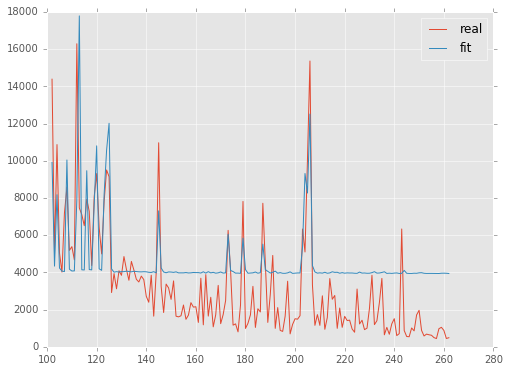

In [86]:
cut = 100
lag = 1
axis = df['id'][lag+cut:]
plt.plot(axis, df['solve'][lag+cut:], label='real')
plt.plot(axis, res.predict()[cut:], label='fit')
plt.legend()

In [87]:
res = smf.ols('solve ~ solve_l1 + diff_hard:solve_l1 -1', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solve   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     3634.
Date:                Sat, 13 May 2017   Prob (F-statistic):          3.17e-190
Time:                        14:27:46   Log-Likelihood:                -2816.6
No. Observations:                 261   AIC:                             5637.
Df Residuals:                     259   BIC:                             5644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
solve_l1               0.8713      0.010     85.207      0.000         0.851     0.891
diff_hard:solve_l1    -0.4055      0.170     -2.387      0.018        -0.740    -0.071
==============================================================================
Omnibus:                       61.517   Durbin-Watson:                   2.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1185.953
Skew:                           0.215   Prob(JB):                    2.98e-258
Kurtosis:                      13.434   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

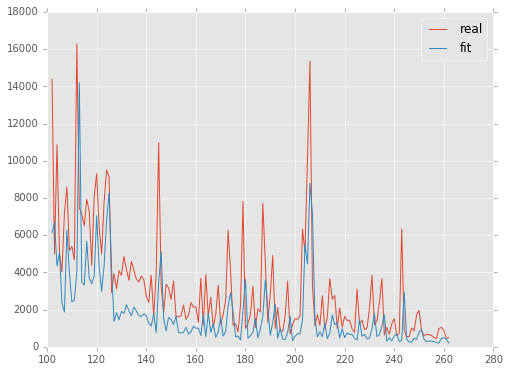

In [88]:
cut = 100
lag = 1
axis = df['id'][lag+cut:]
plt.plot(axis, df['solve'][lag+cut:], label='real')
plt.plot(axis, res.predict()[cut:], label='fit')
plt.legend()

In [89]:
df['solve'].head()

0    537234
1    438350
2    317208
3    285419
4    297082
Name: solve, dtype: int64

In [90]:
res.predict()[:5]

array([ 468102.11456954,  381942.62076033,  276389.31184246,
        248690.9567122 ,  258853.14853592])

In [91]:
res = smf.ols('solve ~ solve_l1 + solve_l2 + diff_hard:solve_l1  -1', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solve   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     2099.
Date:                Sat, 13 May 2017   Prob (F-statistic):          2.30e-180
Time:                        14:27:47   Log-Likelihood:                -2797.0
No. Observations:                 260   AIC:                             5600.
Df Residuals:                     257   BIC:                             5611.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
solve_l1               0.6957      0.060     11.564      0.000         0.577     0.814
solve_l2               0.1718      0.053      3.230      0.001         0.067     0.277
diff_hard:solve_l1    -0.3490      0.166     -2.101      0.037        -0.676    -0.022
==============================================================================
Omnibus:                       76.644   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2966.655
Skew:                          -0.202   Prob(JB):                         0.00
Kurtosis:                      19.543   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
#print(res.summary().as_latex())

In [93]:
res = smf.ols('solve ~ solve_l1 + solve_l2 + diff_hard:solve_l1 + diff_hard:solve_l2 -1', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solve   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1569.
Date:                Sat, 13 May 2017   Prob (F-statistic):          1.03e-178
Time:                        14:27:48   Log-Likelihood:                -2796.8
No. Observations:                 260   AIC:                             5602.
Df Residuals:                     256   BIC:                             5616.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
solve_l1               0.7014      0.061     11.406      0.000         0.580     0.822
solve_l2               0.1667      0.054      3.064      0.002         0.060     0.274
diff_hard:solve_l1    -0.4368      0.253     -1.727      0.085        -0.935     0.061
diff_hard:solve_l2     0.1235      0.268      0.461      0.645        -0.405     0.652
==============================================================================
Omnibus:                       75.816   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2893.093
Skew:                          -0.178   Prob(JB):                         0.00
Kurtosis:                      19.338   Cond. No.                         46.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
res = smf.ols('solve ~ solve_l1 + solve_l2 + solve_l3 + diff_hard:solve_l1 -1', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solve   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1910.
Date:                Sat, 13 May 2017   Prob (F-statistic):          1.06e-188
Time:                        14:27:48   Log-Likelihood:                -2745.4
No. Observations:                 259   AIC:                             5499.
Df Residuals:                     255   BIC:                             5513.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
solve_l1               0.5798      0.054     10.823      0.000         0.474     0.685
solve_l2               0.1711      0.062      2.741      0.007         0.048     0.294
solve_l3               0.1300      0.046      2.809      0.005         0.039     0.221
diff_hard:solve_l1    -0.3202      0.142     -2.247      0.025        -0.601    -0.040
==============================================================================
Omnibus:                       94.148   Durbin-Watson:                   2.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1219.969
Skew:                           1.042   Prob(JB):                    1.22e-265
Kurtosis:                      13.426   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
print(res.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}     &      solve       & \textbf{  R-squared:         } &     0.968   \\
\textbf{Model:}             &       OLS        & \textbf{  Adj. R-squared:    } &     0.967   \\
\textbf{Method:}            &  Least Squares   & \textbf{  F-statistic:       } &     1910.   \\
\textbf{Date:}              & Sat, 13 May 2017 & \textbf{  Prob (F-statistic):} & 1.06e-188   \\
\textbf{Time:}              &     14:27:48     & \textbf{  Log-Likelihood:    } &   -2745.4   \\
\textbf{No. Observations:}  &         259      & \textbf{  AIC:               } &     5499.   \\
\textbf{Df Residuals:}      &         255      & \textbf{  BIC:               } &     5513.   \\
\textbf{Df Model:}          &           4      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lccccc}
                            & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$>$$|$t$|$} & \textbf{[95.0\% Conf. Int.]

In [96]:
res = smf.ols('solve ~ solve_l1 + solve_l2 + solve_l3 + solve_l4 + diff_hard:solve_l1 -1 ', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solve   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1820.
Date:                Sat, 13 May 2017   Prob (F-statistic):          4.90e-196
Time:                        14:27:48   Log-Likelihood:                -2697.7
No. Observations:                 258   AIC:                             5405.
Df Residuals:                     253   BIC:                             5423.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
solve_l1               0.3339      0.055      6.110      0.000         0.226     0.442
solve_l2               0.2081      0.055      3.776      0.000         0.100     0.317
solve_l3               0.0363      0.055      0.660      0.510        -0.072     0.145
solve_l4               0.2581      0.041      6.323      0.000         0.178     0.338
diff_hard:solve_l1    -0.2193      0.124     -1.767      0.079        -0.464     0.025
==============================================================================
Omnibus:                      135.383   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1713.428
Skew:                           1.761   Prob(JB):                         0.00
Kurtosis:                      15.123   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
print(res.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}     &      solve       & \textbf{  R-squared:         } &     0.973   \\
\textbf{Model:}             &       OLS        & \textbf{  Adj. R-squared:    } &     0.972   \\
\textbf{Method:}            &  Least Squares   & \textbf{  F-statistic:       } &     1820.   \\
\textbf{Date:}              & Sat, 13 May 2017 & \textbf{  Prob (F-statistic):} & 4.90e-196   \\
\textbf{Time:}              &     14:27:49     & \textbf{  Log-Likelihood:    } &   -2697.7   \\
\textbf{No. Observations:}  &         258      & \textbf{  AIC:               } &     5405.   \\
\textbf{Df Residuals:}      &         253      & \textbf{  BIC:               } &     5423.   \\
\textbf{Df Model:}          &           5      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lccccc}
                            & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$>$$|$t$|$} & \textbf{[95.0\% Conf. Int.]

In [98]:
res = smf.ols('solve ~ solve_l1 + solve_l2 + solve_l3 + diff_hard:solve_l1 -1', data=df).fit()

In [99]:
res.params

solve_l1              0.579769
solve_l2              0.171104
solve_l3              0.130010
diff_hard:solve_l1   -0.320158
dtype: float64

In [100]:
mat = np.zeros((16,7)) + np.array([10000,9500,9000,0,0,0,0])

In [101]:
mat

array([[ 10000.,   9500.,   9000.,      0.,      0.,      0.,      0.],
       [ 10000.,   9500.,   9000.,      0.,      0.,      0.,      0.],
       [ 10000.,   9500.,   9000.,      0.,      0.,      0.,      0.],
       [ 10000.,   9500.,   9000.,      0.,      0.,      0.,      0.],
       [ 10000.,   9500.,   9000.,      0.,      0.,      0.,      0.],
       [ 10000.,   9500.,   9000.,      0.,      0.,      0.,      0.],
       [ 10000.,   9500.,   9000.,      0.,      0.,      0.,      0.],
       [ 10000.,   9500.,   9000.,      0.,      0.,      0.,      0.],
       [ 10000.,   9500.,   9000.,      0.,      0.,      0.,      0.],
       [ 10000.,   9500.,   9000.,      0.,      0.,      0.,      0.],
       [ 10000.,   9500.,   9000.,      0.,      0.,      0.,      0.],
       [ 10000.,   9500.,   9000.,      0.,      0.,      0.,      0.],
       [ 10000.,   9500.,   9000.,      0.,      0.,      0.,      0.],
       [ 10000.,   9500.,   9000.,      0.,      0.,      0.,   

In [102]:
coef = res.params[:3]
coef_h = res.params[3]

In [103]:
from itertools import product

In [104]:
hd = list(product(*[[0,1]]*4))
hd

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [105]:
for i in range(16):
    hard_dis = hd[i]
    for j in range(4):
        mat[i][j+3] = np.dot(coef,mat[i][j:j+3]) + coef_h*hard_dis[j]*mat[i][j+2]

In [106]:
mat.astype('int')

array([[10000,  9500,  9000,  8593,  8164,  7749,  7386],
       [10000,  9500,  9000,  8593,  8164,  7749,  4905],
       [10000,  9500,  9000,  8593,  8164,  5135,  7046],
       [10000,  9500,  9000,  8593,  8164,  5135,  5402],
       [10000,  9500,  9000,  8593,  5413,  7392,  6869],
       [10000,  9500,  9000,  8593,  5413,  7392,  4502],
       [10000,  9500,  9000,  8593,  5413,  5658,  6644],
       [10000,  9500,  9000,  8593,  5413,  5658,  4832],
       [10000,  9500,  9000,  5711,  7790,  7208,  5581],
       [10000,  9500,  9000,  5711,  7790,  7208,  3273],
       [10000,  9500,  9000,  5711,  7790,  4713,  5257],
       [10000,  9500,  9000,  5711,  7790,  4713,  3748],
       [10000,  9500,  9000,  5711,  5961,  6970,  5237],
       [10000,  9500,  9000,  5711,  5961,  6970,  3006],
       [10000,  9500,  9000,  5711,  5961,  5061,  4989],
       [10000,  9500,  9000,  5711,  5961,  5061,  3369]])

$$
\begin{array}{c|ccccccc}
\mathrm{Hard} & 1 & 2& 3 & 4 & 5 & 6 &7 \\
\hline
EEEE & 10000 & 9500 & 9000 & 8593 & 8164 & 7749 & 7386 \\
EEEE & 10000 & 9500 & 9000 & 8593 & 8164 & 7749 & 7386 \\
\end{array}
$$

In [107]:
template_head = r'''\begin{array}{c|ccccccc}
\mathrm{Hard} & 1 & 2& 3 & 4 & 5 & 6 &7 \\
\hline'''
template_tail = r'''\end{array}'''
rl = []
for row,hard_dis in zip(mat.astype('int'),hd):
    head = ''.join(['E' if h == 0 else 'H' for h in hard_dis])
    line = '\\mathrm{{{}}}'.format(head)+ ' & ' + ' & '.join([str(n) for n in row]) + ' \\\\'
    rl.append(line)

In [108]:
'\n'.join([template_head] + rl + [template_tail])

'\\begin{array}{c|ccccccc}\n\\mathrm{Hard} & 1 & 2& 3 & 4 & 5 & 6 &7 \\\\\n\\hline\n\\mathrm{EEEE} & 10000 & 9500 & 9000 & 8593 & 8164 & 7749 & 7386 \\\\\n\\mathrm{EEEH} & 10000 & 9500 & 9000 & 8593 & 8164 & 7749 & 4905 \\\\\n\\mathrm{EEHE} & 10000 & 9500 & 9000 & 8593 & 8164 & 5135 & 7046 \\\\\n\\mathrm{EEHH} & 10000 & 9500 & 9000 & 8593 & 8164 & 5135 & 5402 \\\\\n\\mathrm{EHEE} & 10000 & 9500 & 9000 & 8593 & 5413 & 7392 & 6869 \\\\\n\\mathrm{EHEH} & 10000 & 9500 & 9000 & 8593 & 5413 & 7392 & 4502 \\\\\n\\mathrm{EHHE} & 10000 & 9500 & 9000 & 8593 & 5413 & 5658 & 6644 \\\\\n\\mathrm{EHHH} & 10000 & 9500 & 9000 & 8593 & 5413 & 5658 & 4832 \\\\\n\\mathrm{HEEE} & 10000 & 9500 & 9000 & 5711 & 7790 & 7208 & 5581 \\\\\n\\mathrm{HEEH} & 10000 & 9500 & 9000 & 5711 & 7790 & 7208 & 3273 \\\\\n\\mathrm{HEHE} & 10000 & 9500 & 9000 & 5711 & 7790 & 4713 & 5257 \\\\\n\\mathrm{HEHH} & 10000 & 9500 & 9000 & 5711 & 7790 & 4713 & 3748 \\\\\n\\mathrm{HHEE} & 10000 & 9500 & 9000 & 5711 & 5961 & 6970 & 5237

In [109]:
print(_)

\begin{array}{c|ccccccc}
\mathrm{Hard} & 1 & 2& 3 & 4 & 5 & 6 &7 \\
\hline
\mathrm{EEEE} & 10000 & 9500 & 9000 & 8593 & 8164 & 7749 & 7386 \\
\mathrm{EEEH} & 10000 & 9500 & 9000 & 8593 & 8164 & 7749 & 4905 \\
\mathrm{EEHE} & 10000 & 9500 & 9000 & 8593 & 8164 & 5135 & 7046 \\
\mathrm{EEHH} & 10000 & 9500 & 9000 & 8593 & 8164 & 5135 & 5402 \\
\mathrm{EHEE} & 10000 & 9500 & 9000 & 8593 & 5413 & 7392 & 6869 \\
\mathrm{EHEH} & 10000 & 9500 & 9000 & 8593 & 5413 & 7392 & 4502 \\
\mathrm{EHHE} & 10000 & 9500 & 9000 & 8593 & 5413 & 5658 & 6644 \\
\mathrm{EHHH} & 10000 & 9500 & 9000 & 8593 & 5413 & 5658 & 4832 \\
\mathrm{HEEE} & 10000 & 9500 & 9000 & 5711 & 7790 & 7208 & 5581 \\
\mathrm{HEEH} & 10000 & 9500 & 9000 & 5711 & 7790 & 7208 & 3273 \\
\mathrm{HEHE} & 10000 & 9500 & 9000 & 5711 & 7790 & 4713 & 5257 \\
\mathrm{HEHH} & 10000 & 9500 & 9000 & 5711 & 7790 & 4713 & 3748 \\
\mathrm{HHEE} & 10000 & 9500 & 9000 & 5711 & 5961 & 6970 & 5237 \\
\mathrm{HHEH} & 10000 & 9500 & 9000 & 5711 & 5961 & 69

$$
\begin{array}{c|ccccccc}
\mathrm{Hard} & 1 & 2& 3 & 4 & 5 & 6 &7 \\
\hline
\mathrm{EEEE} & 10000 & 9500 & 9000 & 8593 & 8164 & 7749 & 7386 \\
\mathrm{EEEH} & 10000 & 9500 & 9000 & 8593 & 8164 & 7749 & 4905 \\
\mathrm{EEHE} & 10000 & 9500 & 9000 & 8593 & 8164 & 5135 & 7046 \\
\mathrm{EEHH} & 10000 & 9500 & 9000 & 8593 & 8164 & 5135 & 5402 \\
\mathrm{EHEE} & 10000 & 9500 & 9000 & 8593 & 5413 & 7392 & 6869 \\
\mathrm{EHEH} & 10000 & 9500 & 9000 & 8593 & 5413 & 7392 & 4502 \\
\mathrm{EHHE} & 10000 & 9500 & 9000 & 8593 & 5413 & 5658 & 6644 \\
\mathrm{EHHH} & 10000 & 9500 & 9000 & 8593 & 5413 & 5658 & 4832 \\
\mathrm{HEEE} & 10000 & 9500 & 9000 & 5711 & 7790 & 7208 & 5581 \\
\mathrm{HEEH} & 10000 & 9500 & 9000 & 5711 & 7790 & 7208 & 3273 \\
\mathrm{HEHE} & 10000 & 9500 & 9000 & 5711 & 7790 & 4713 & 5257 \\
\mathrm{HEHH} & 10000 & 9500 & 9000 & 5711 & 7790 & 4713 & 3748 \\
\mathrm{HHEE} & 10000 & 9500 & 9000 & 5711 & 5961 & 6970 & 5237 \\
\mathrm{HHEH} & 10000 & 9500 & 9000 & 5711 & 5961 & 6970 & 3006 \\
\mathrm{HHHE} & 10000 & 9500 & 9000 & 5711 & 5961 & 5061 & 4989 \\
\mathrm{HHHH} & 10000 & 9500 & 9000 & 5711 & 5961 & 5061 & 3369 \\
\end{array}
$$

In [110]:
res = smf.ols('solve ~ solve_l1 + solve_l2 + solve_l3 + diff_hard:solve_l1 + diff_hard:solve_l1:rC -1 ', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solve   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1910.
Date:                Sat, 13 May 2017   Prob (F-statistic):          1.06e-188
Time:                        14:27:51   Log-Likelihood:                -2745.4
No. Observations:                 259   AIC:                             5499.
Df Residuals:                     255   BIC:                             5513.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
solve_l1                  0.5798      0.054     10.823      0.000         0.474     0.685
solve_l2                  0.1711      0.062      2.741      0.007         0.048     0.294
solve_l3                  0.1300      0.046      2.809      0.005         0.039     0.221
diff_hard:solve_l1       -0.1601      0.071     -2.247      0.025        -0.300    -0.020
diff_hard:solve_l1:rC    -0.1601      0.071     -2.247      0.025        -0.300    -0.020
==============================================================================
Omnibus:                       94.148   Durbin-Watson:                   2.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1219.969
Skew:                           1.042   Prob(JB):                    1.22e-265
Kurtosis:                      13.426   Cond. No.                     2.00e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.02e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [130]:
K = int(df.shape[0] * 1/2)
df['left'] = (df['id'] < K).astype('int')
df['right'] = (df['id'] >= K).astype('int')

In [131]:
res = smf.ols('solve ~ solve_l1 + solve_l2 + solve_l3 + diff_hard:solve_l1 + diff_hard:solve_l1:right -1 ', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solve   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1523.
Date:                Sat, 13 May 2017   Prob (F-statistic):          4.62e-187
Time:                        14:31:00   Log-Likelihood:                -2745.3
No. Observations:                 259   AIC:                             5501.
Df Residuals:                     254   BIC:                             5518.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
solve_l1                     0.5800      0.054     10.808      0.000         0.474     0.686
solve_l2                     0.1706      0.063      2.728      0.007         0.047     0.294
solve_l3                     0.1303      0.046      2.809      0.005         0.039     0.222
diff_hard:solve_l1          -0.3482      0.163     -2.131      0.034        -0.670    -0.026
diff_hard:solve_l1:right     0.1162      0.329      0.353      0.725        -0.532     0.765
==============================================================================
Omnibus:                       94.967   Durbin-Watson:                   2.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1216.730
Skew:                           1.059   Prob(JB):                    6.17e-265
Kurtosis:                      13.405   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
print(res.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}          &      solve       & \textbf{  R-squared:         } &     0.968   \\
\textbf{Model:}                  &       OLS        & \textbf{  Adj. R-squared:    } &     0.967   \\
\textbf{Method:}                 &  Least Squares   & \textbf{  F-statistic:       } &     1523.   \\
\textbf{Date:}                   & Sat, 13 May 2017 & \textbf{  Prob (F-statistic):} & 4.62e-187   \\
\textbf{Time:}                   &     14:29:04     & \textbf{  Log-Likelihood:    } &   -2745.3   \\
\textbf{No. Observations:}       &         259      & \textbf{  AIC:               } &     5501.   \\
\textbf{Df Residuals:}           &         254      & \textbf{  BIC:               } &     5518.   \\
\textbf{Df Model:}               &           5      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lccccc}
                                 & \textbf{coef} & \textbf{std err} & \textbf{t} & \text

In [147]:
res = smf.ols('solve ~ solve_l1 + solve_l2 + solve_l3 + solve_l1:diff + solve_l1:diff:id -1 ', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solve   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1619.
Date:                Sat, 13 May 2017   Prob (F-statistic):          2.34e-190
Time:                        14:47:25   Log-Likelihood:                -2737.6
No. Observations:                 259   AIC:                             5485.
Df Residuals:                     254   BIC:                             5503.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
solve_l1             0.7618      0.068     11.162      0.000         0.627     0.896
solve_l2             0.1196      0.062      1.931      0.055        -0.002     0.242
solve_l3             0.1470      0.045      3.245      0.001         0.058     0.236
solve_l1:diff       -0.0302      0.008     -3.921      0.000        -0.045    -0.015
solve_l1:diff:id     0.0001   5.47e-05      2.705      0.007      4.02e-05     0.000
==============================================================================
Omnibus:                       98.904   Durbin-Watson:                   2.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1333.652
Skew:                           1.107   Prob(JB):                    2.52e-290
Kurtosis:                      13.894   Cond. No.                     4.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
print(res.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &      solve       & \textbf{  R-squared:         } &     0.970   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.969   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     1619.   \\
\textbf{Date:}             & Sat, 13 May 2017 & \textbf{  Prob (F-statistic):} & 2.34e-190   \\
\textbf{Time:}             &     14:47:52     & \textbf{  Log-Likelihood:    } &   -2737.6   \\
\textbf{No. Observations:} &         259      & \textbf{  AIC:               } &     5485.   \\
\textbf{Df Residuals:}     &         254      & \textbf{  BIC:               } &     5503.   \\
\textbf{Df Model:}         &           5      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lccccc}
                          & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$>$$|$t$|$} & \textbf{[95.0\% Conf. Int.]}  \\
\mid